# COSTUMER SEGMENTATION USING CLUSTERING AND PCA

The following project aims to analyze a data set which contains information of financial transactions to discover hidden data patterns and classify costumers for future targeted marketing in a bank. 
We are going to perform Unsupervised machine learning techniques namely , Clustering with Kmeans and PCA.

*Author: Roberto Daniel Totolici*

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [3]:
creditcard_data_df = pd.read_csv("marketing_data.csv")

In [4]:
creditcard_data_df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Exploratory Data Analysis and Data cleaning

In [5]:
creditcard_data_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
creditcard_data_df.drop('CUST_ID', axis = 1, inplace = True)

In [7]:
creditcard_data_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
creditcard_data_df.loc[(creditcard_data_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_data_df['MINIMUM_PAYMENTS'].mean()
creditcard_data_df.loc[(creditcard_data_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_data_df['CREDIT_LIMIT'].mean()

In [9]:
creditcard_data_df.duplicated().sum()

0

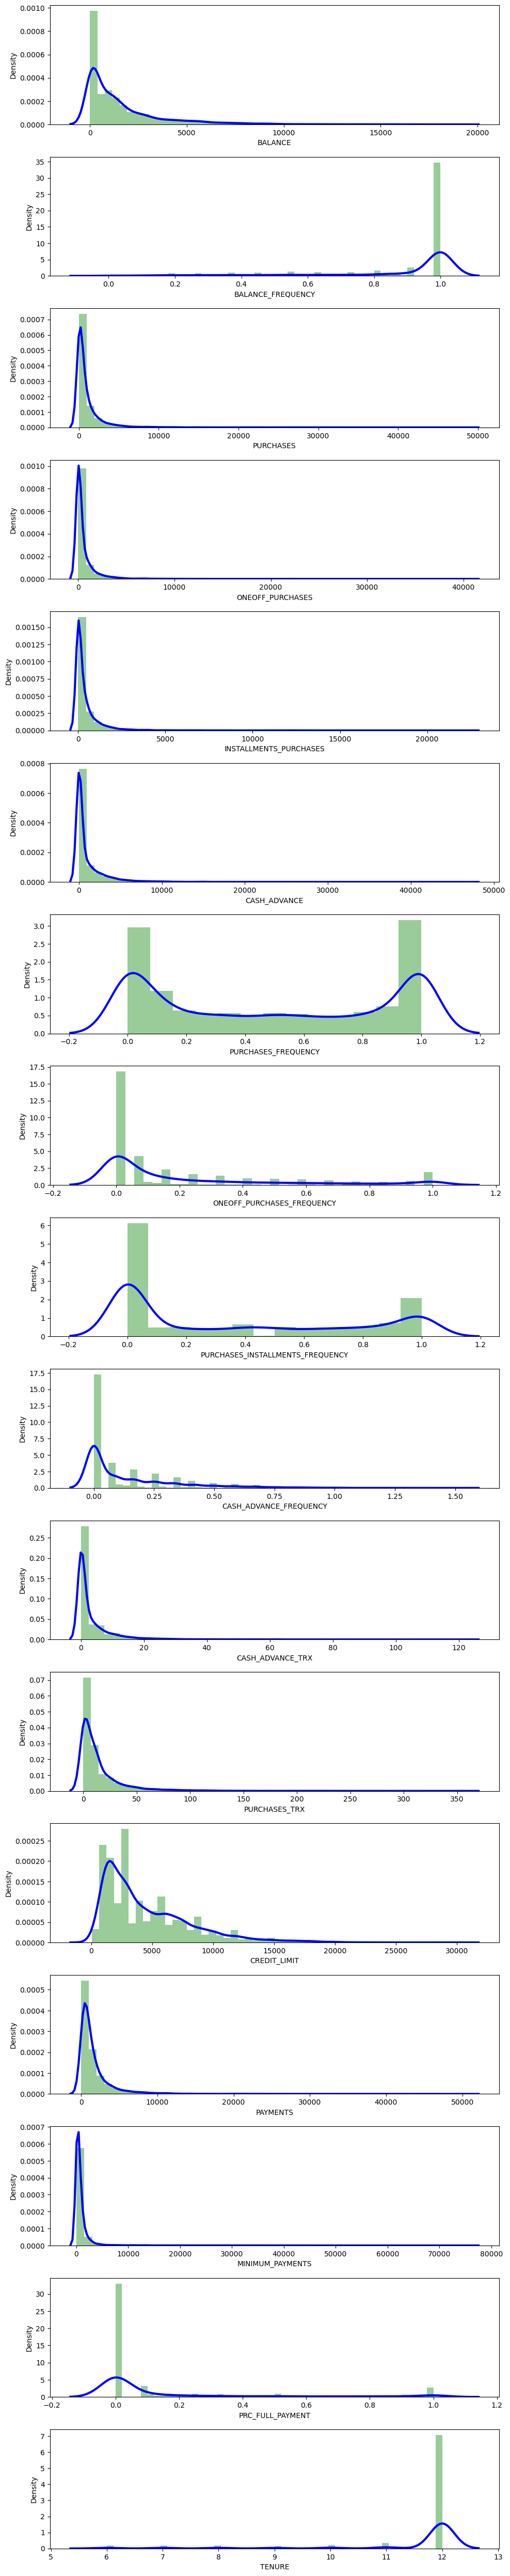

In [10]:
plt.figure(figsize=(10, 50))

# Loop through the columns
for i in range(len(creditcard_data_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(creditcard_data_df[creditcard_data_df.columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'g'})

plt.tight_layout()
plt.show()


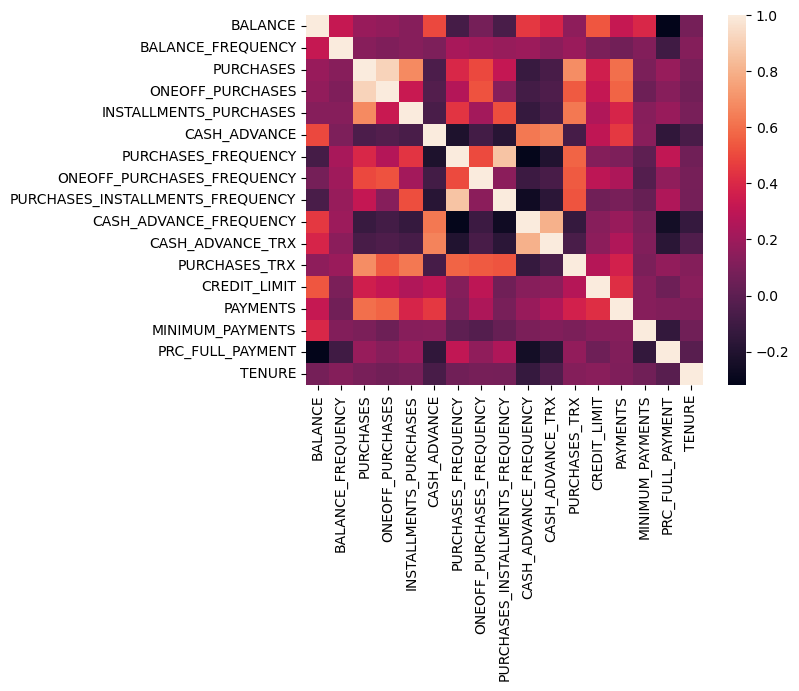

In [11]:
cor_matrix = creditcard_data_df.corr()
sns.heatmap(cor_matrix)
plt.show()

## KMEANS

###### Apply elbow method to find number of optimal clusters

In [51]:
#Scale numeric features
scaler = StandardScaler()
creditcard_data_df_scaled = scaler.fit_transform(creditcard_data_df)

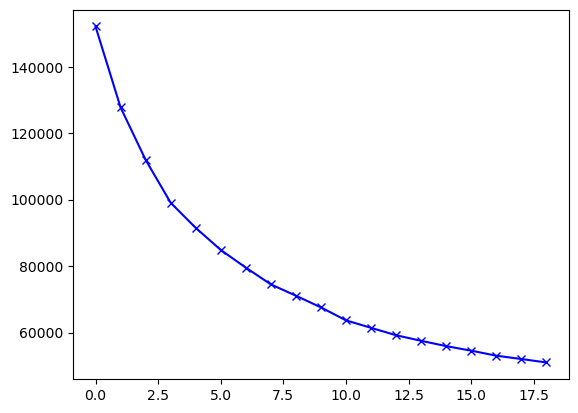

In [52]:
scores = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_data_df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.show()

In [59]:
#We select 7 clusters
kmeans = KMeans(3)
kmeans.fit(creditcard_data_df_scaled)
labels = kmeans.labels_

In [60]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [creditcard_data_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1.165728          0.340034 -0.289466        -0.206762   
1 -0.366109         -0.178764 -0.234554        -0.206138   
2  0.305126          0.439790  1.510512         1.267068   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.304647     1.383826           -0.643411   
1              -0.175784    -0.309117           -0.066819   
2               1.243340    -0.249405            1.142128   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.306244                        -0.554662   
1                  -0.240950                        -0.049240   
2                   1.562978                         0.943834   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.565377         1.344846     -0.367336     0.603783   
1              -0.333429        -0.298293     -0.246065    -0.337125   
2              -0.361291        -0.252699      1.665428     0.876940   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.445816         0.382170        -0.409640 -0.126202  
1 -0.285057        -0.132510         0.003447 -0.028419  
2  0.823623         0.160882         0.503013  0.298658

In [61]:
#Let's scale back applying an inverse Transformation , to see what these values mean
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_data_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  3990.839154          0.957822   384.756151       249.255119   
1   802.449062          0.834923   502.076995       250.290431   
2  2199.568262          0.981453  4230.436369      2695.510910   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             135.578811  3880.817980            0.232119   
1             252.107992   330.637963            0.463533   
2            1535.404310   455.857802            0.948742   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.111099                         0.144000   
1                   0.130578                         0.344868   
2                   0.668724                         0.739541   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.448392        12.426415      5.579245  6691.260720   
1               0.068422         1.213198      8.593581  3267.851324   
2               0.062846         1.524342     56.106145  7685.115722   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3023.736154      1754.838260         0.033902  11.348428  
1   907.930434       555.398616         0.154723  11.479286  
2  4117.450780      1239.135172         0.300837  11.916999

In [62]:
#Associated labels for each data point
y_kmeans = kmeans.fit_predict(creditcard_data_df_scaled)
y_kmeans

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [63]:
creditcard_data_df_cluster = pd.concat([creditcard_data_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_data_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

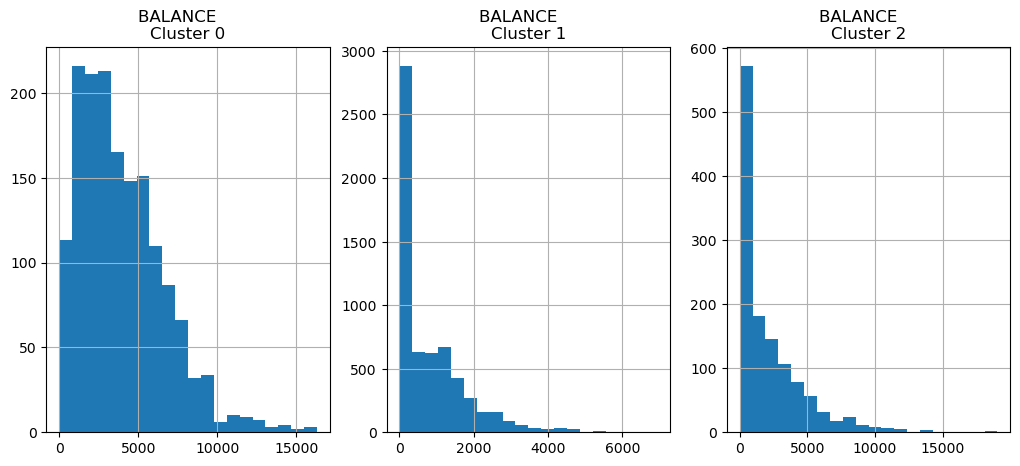

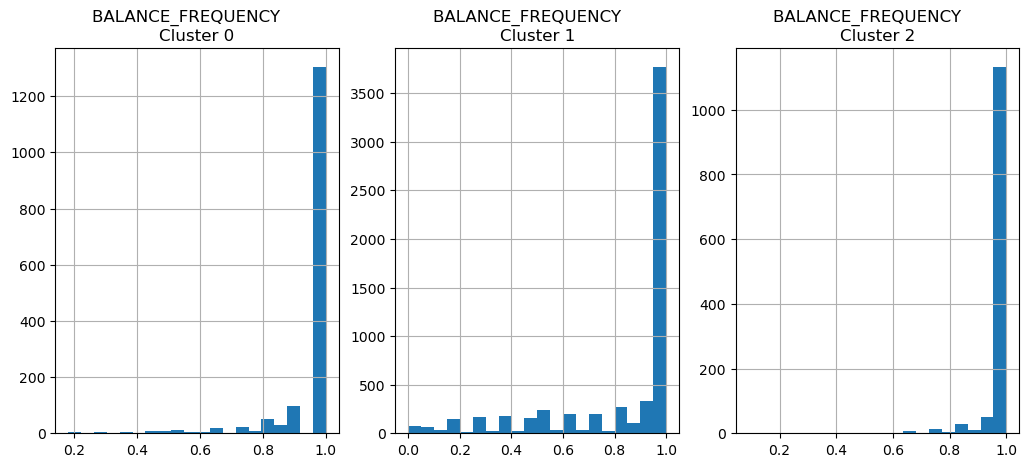

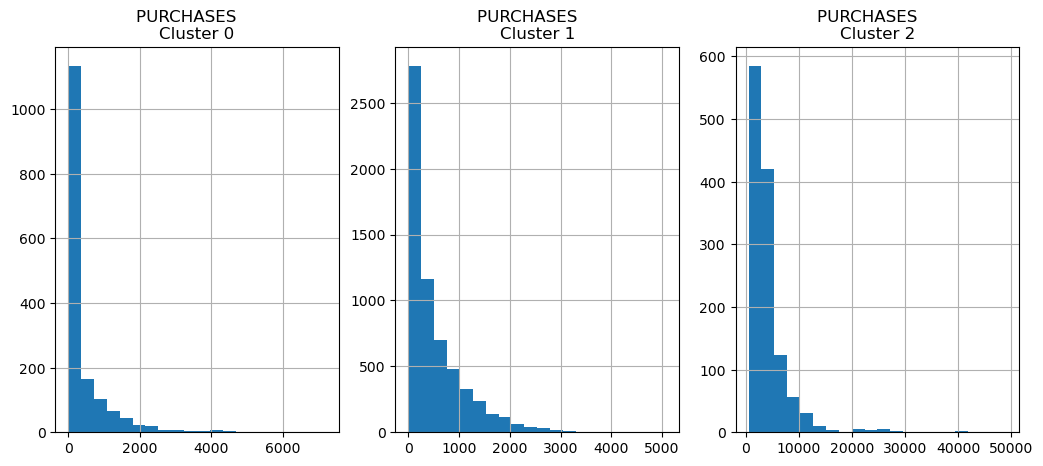

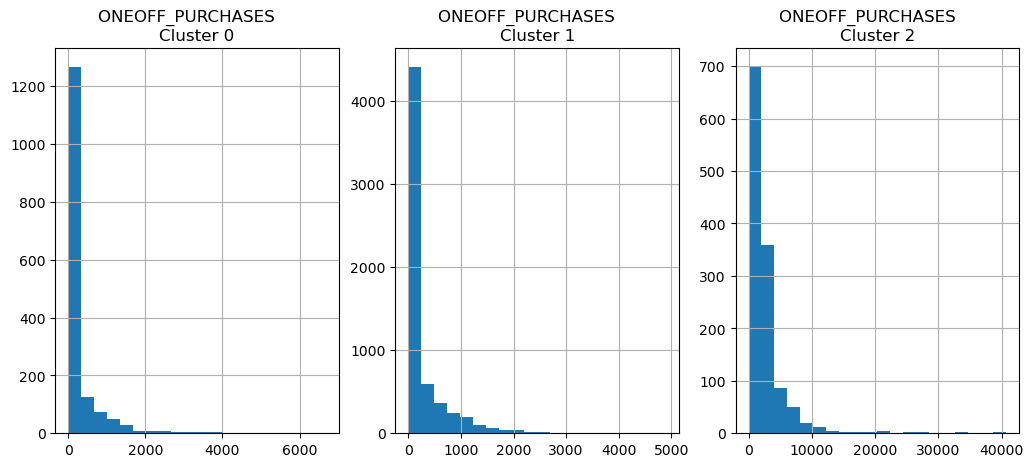

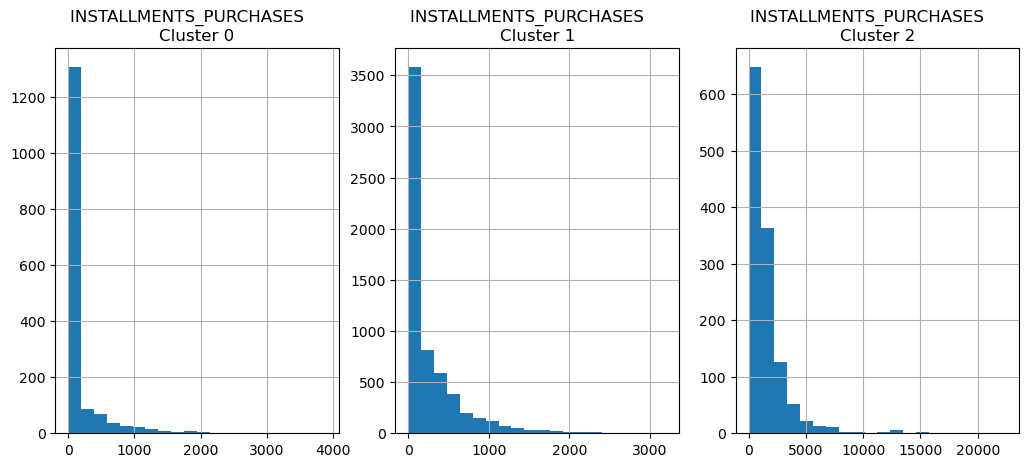

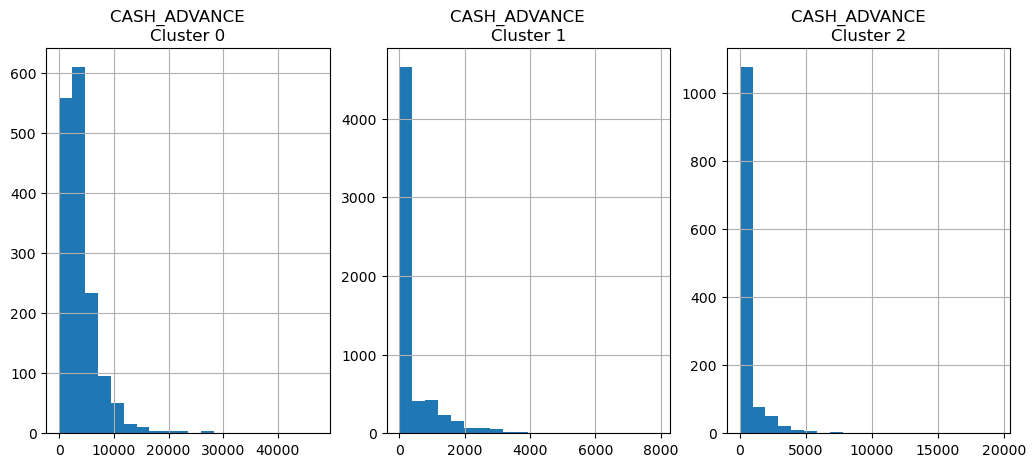

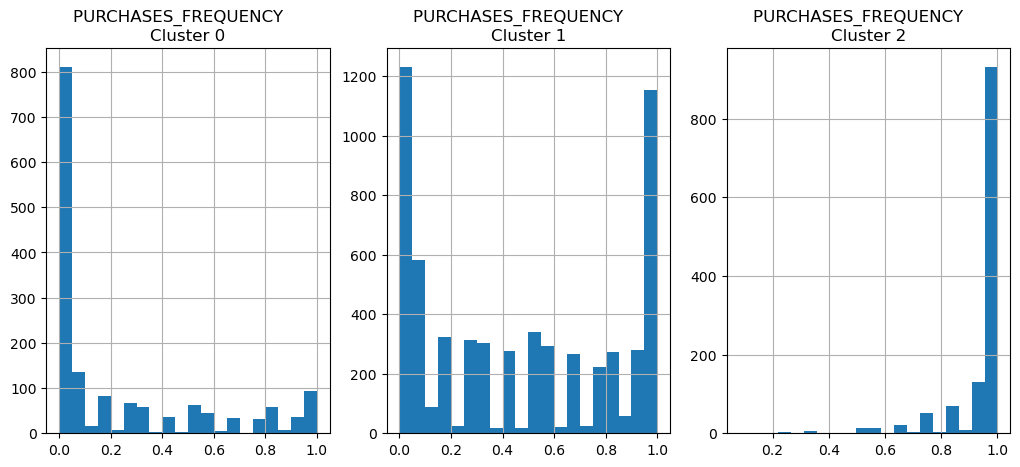

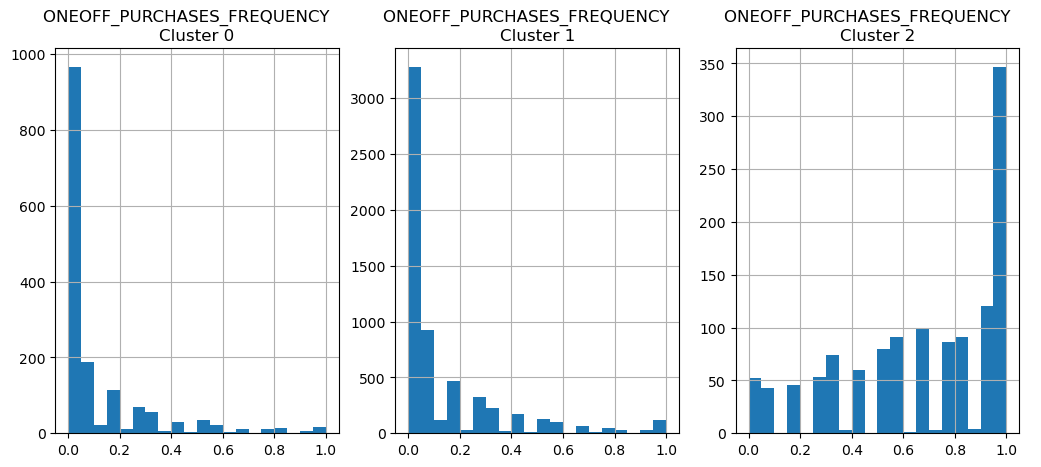

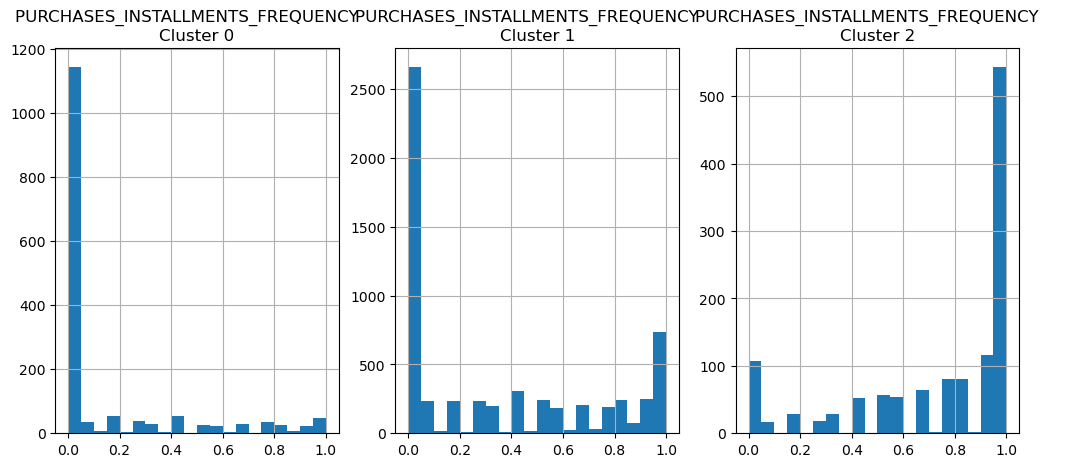

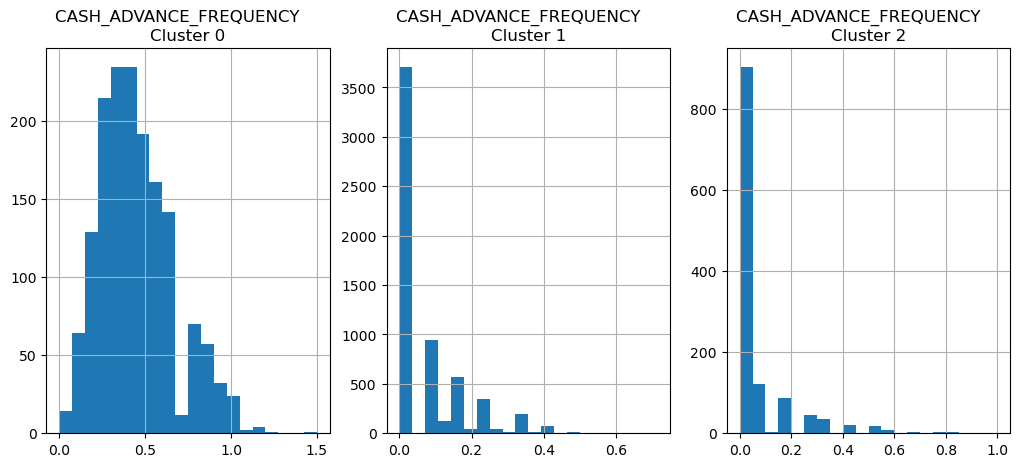

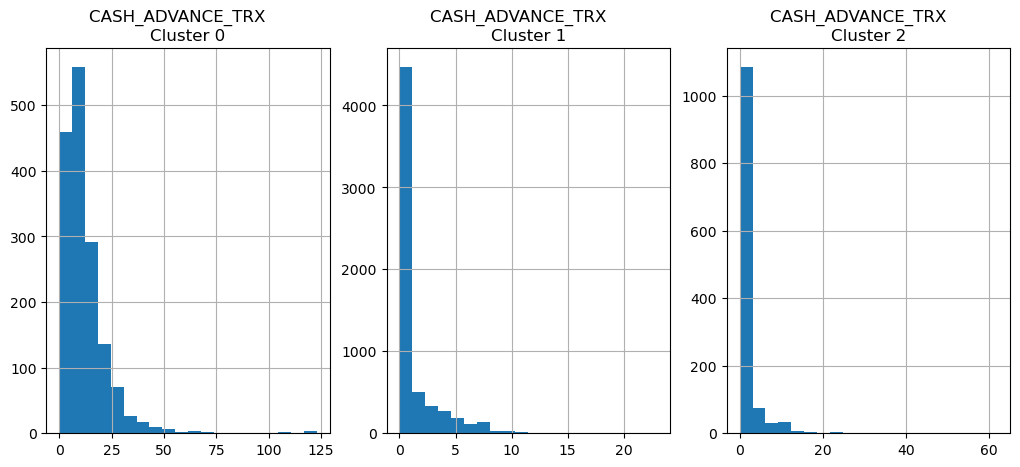

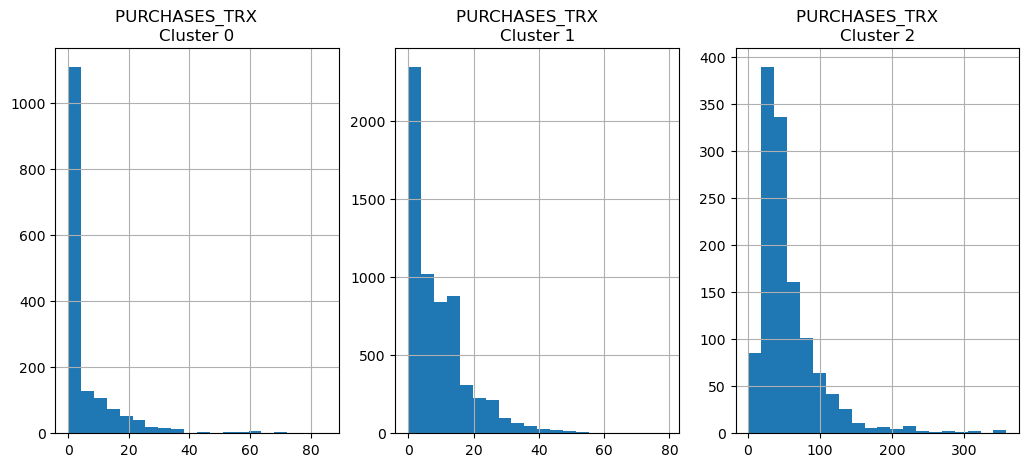

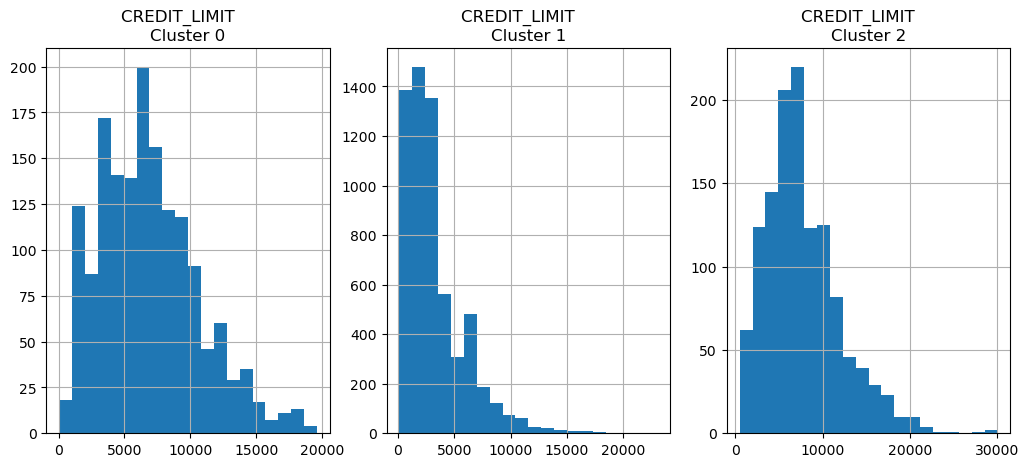

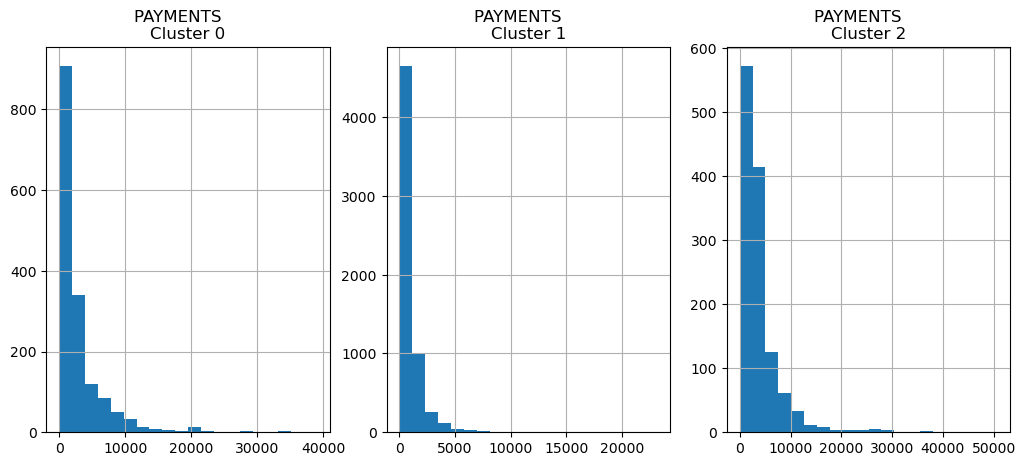

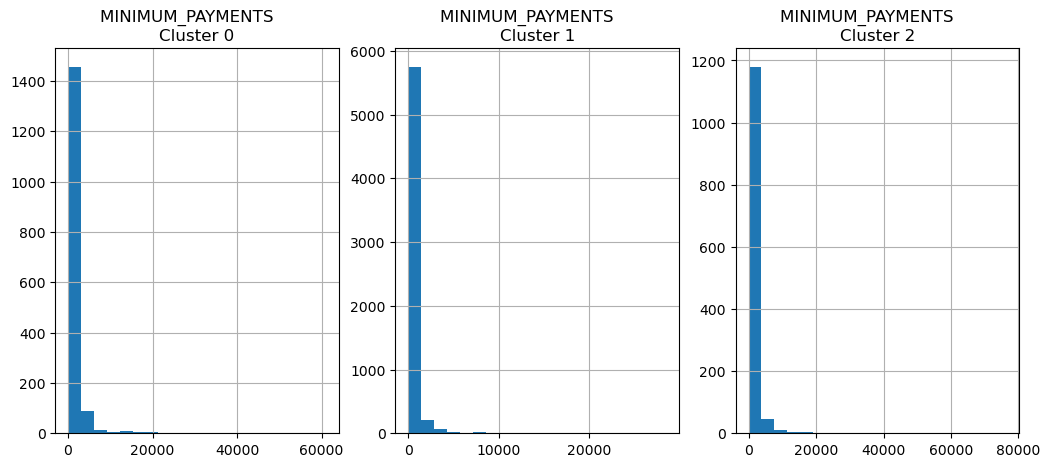

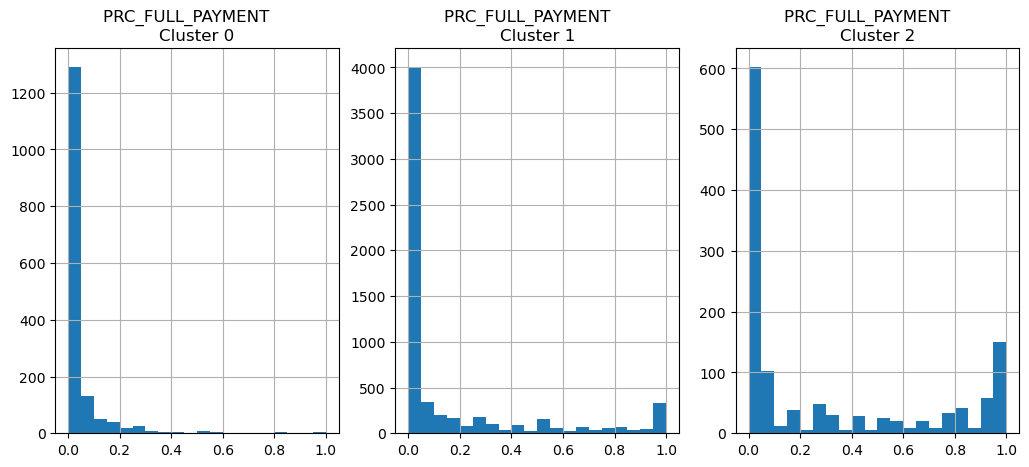

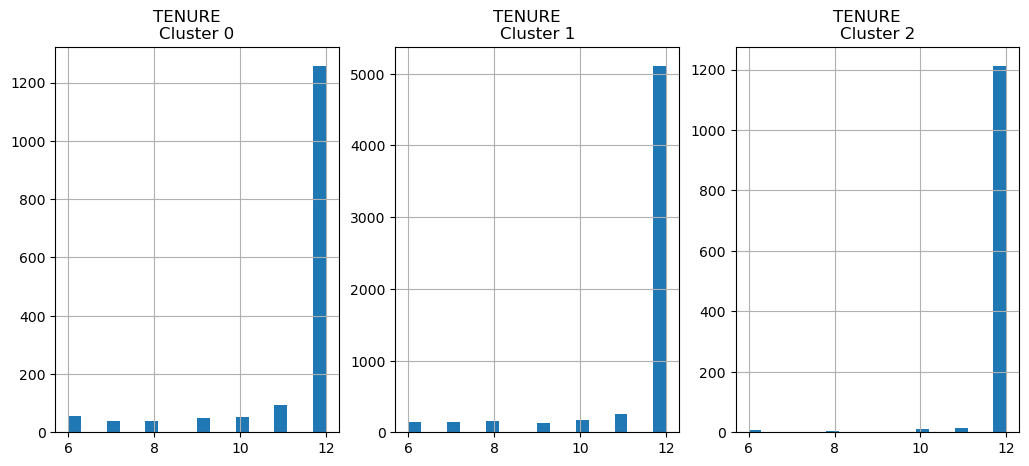

In [64]:
#plot features for each cluster
for i in creditcard_data_df.columns:
    plt.figure(figsize = (30,5))
    for j in range(3):
        plt.subplot(1,7,j+1)
        cluster = creditcard_data_df_cluster[creditcard_data_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
plt.show()

### Principal Component Analysis

In [66]:
pca = PCA(n_components= 2)
prin_comp = pca.fit_transform(creditcard_data_df_scaled)

pca_df=  pd.DataFrame(data = prin_comp , columns = ['pca1', 'pca2'])

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

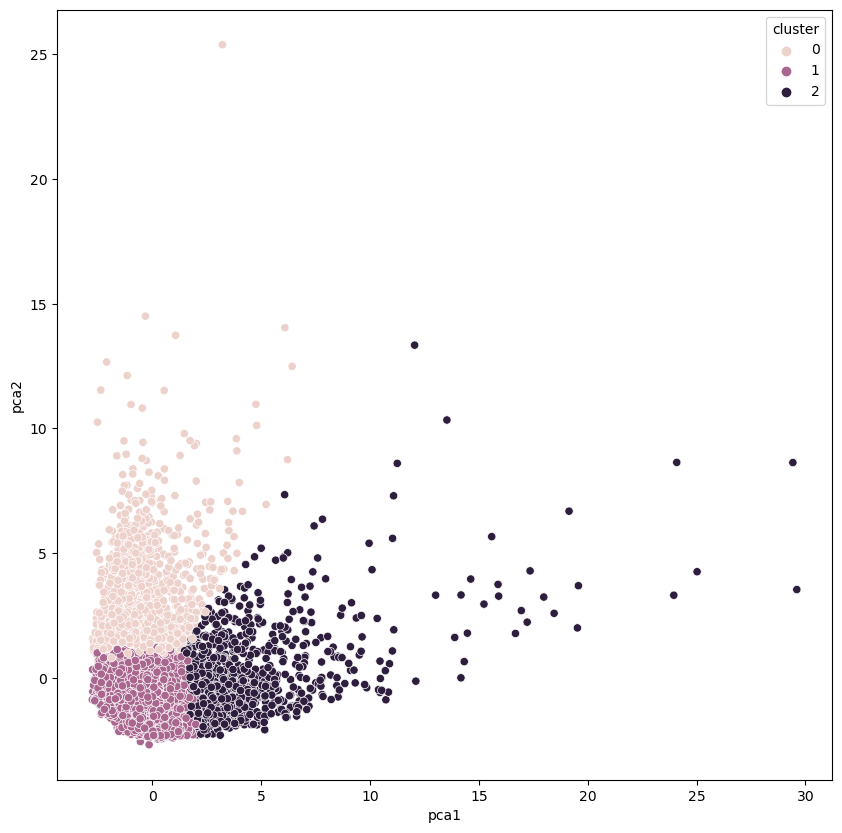

In [67]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y= 'pca2', data = pca_df, hue = 'cluster')

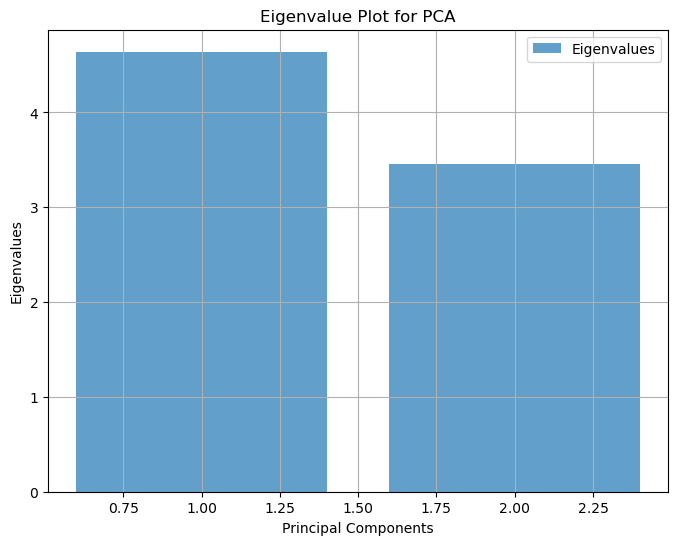

In [68]:
eigenvalues = pca.explained_variance_

# Create a bar plot of eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, align='center', label='Eigenvalues')
plt.ylabel('Eigenvalues')
plt.xlabel('Principal Components')
plt.title('Eigenvalue Plot for PCA')
plt.legend()
plt.grid()

plt.show()



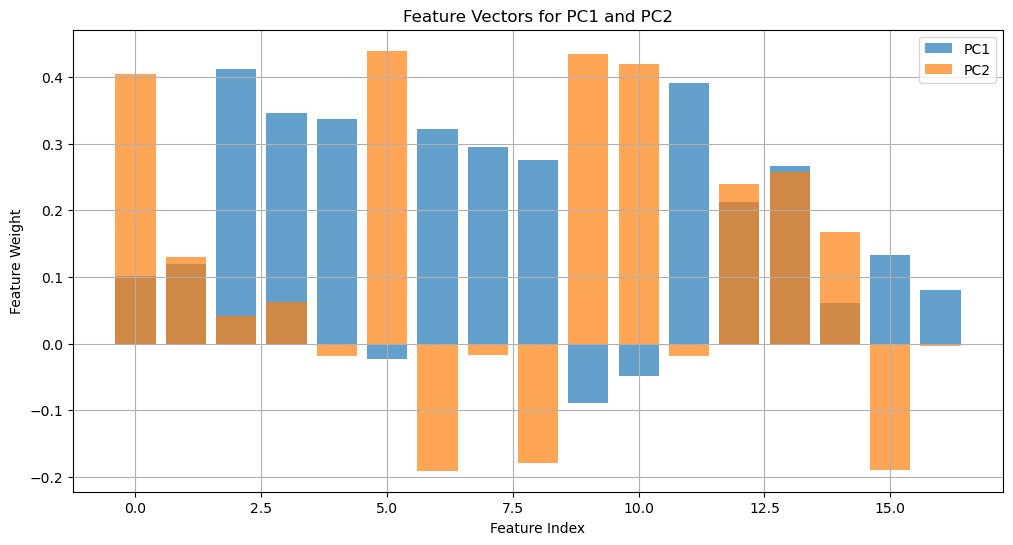

In [69]:
# Get the principal component vectors
principal_components = pca.components_

# Create a bar plot to show the feature vectors for the first two principal components
plt.figure(figsize=(12, 6))
plt.bar(range(len(principal_components[0])), principal_components[0], label='PC1', alpha=0.7)
plt.bar(range(len(principal_components[1])), principal_components[1], label='PC2', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.title('Feature Vectors for PC1 and PC2')
plt.legend()
plt.grid()

plt.show()

# Conclusion

After we've performed clustering selecting 4 different groups of data points we later on reduced its dimensionality to better understand the behaviour of these groups.

The following insights can be derived from these analysis:


1.There exist a clear pattern between the following groups of people:

People in cluster 0 have a wider range of balance but with more frequency of cash advanced money , making more transactions depending on that money and therefore accessing to wider range of limit on their credit between 5000$ and 10000$ and also we can see that their full payment on the billing cycle is very low, giving to us the insight that this group depend more on their credit card and probably having higher rates.

People in cluster 1 have a more disperse balance frequency and therefore lower balance, they don’t rely that much on cash advanced money and they make purchases more frequently and some of these people usually fully pay their balance, some of them make few purchases and others do purchase more things, but not one-off purchases so, they have medium range of credit limit , around 1000 and 7000 $ , giving us the insight that this group regularly rely on their credit for regular purchases but they don’t exceed their needs, probably having a regular rate, like new clients.

People in the cluster 2 have more balance frequency and make more one off purchases and being these purchases more frequent they rely more on installment purchases and have a wider range of credit limit .They also make more frequently full payments of their credit card that month, and they also have more tenure on their credit card, being these a group that can be described by their regular use of credit card and tenure , allowing them to purchase more things, and these purchases being one off purchases , driven by impulse or value opportunities, I would characterize them as a usual card credit costumer with a longer tenure but with spontaneous needs and more confidence on their debt
